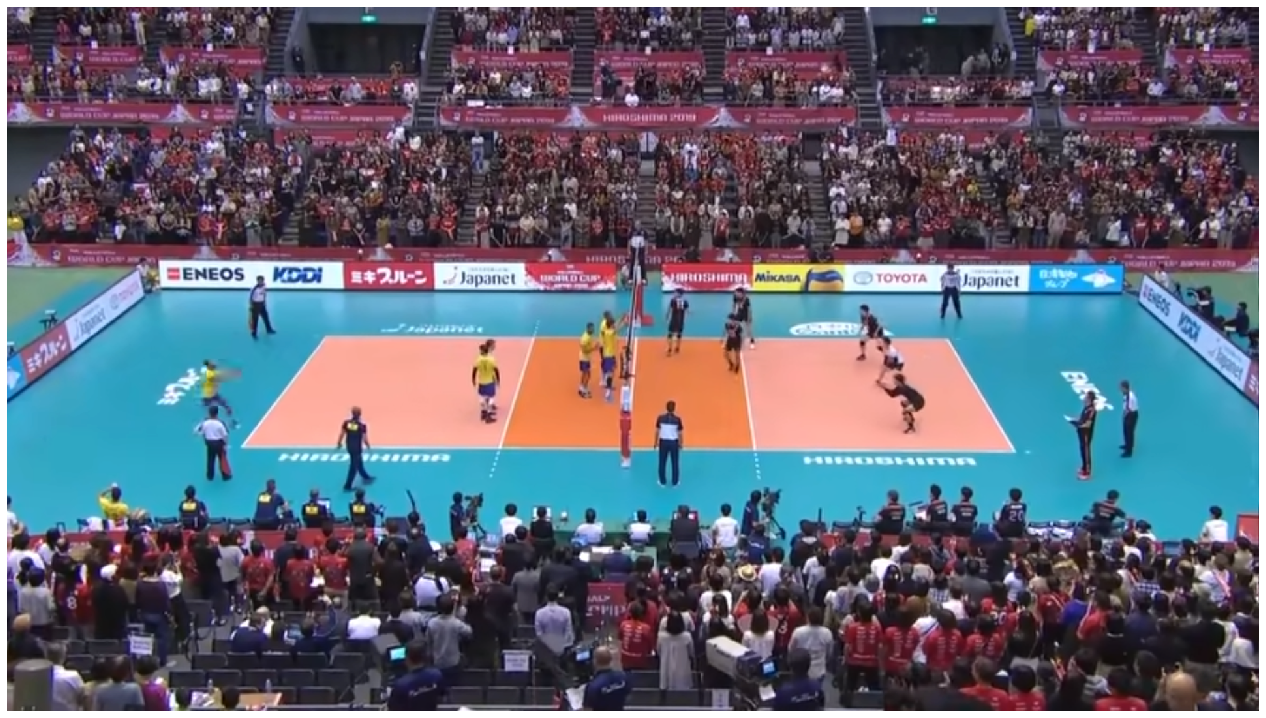

In [45]:
#Obrazek
import skimage as ski
from skimage import data,io,img_as_float
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(20, 20))
x=plt.subplot(2, 1, 1)
x.axis('off')
img = img_as_float(data.imread('field.png'))
io.imshow(img)



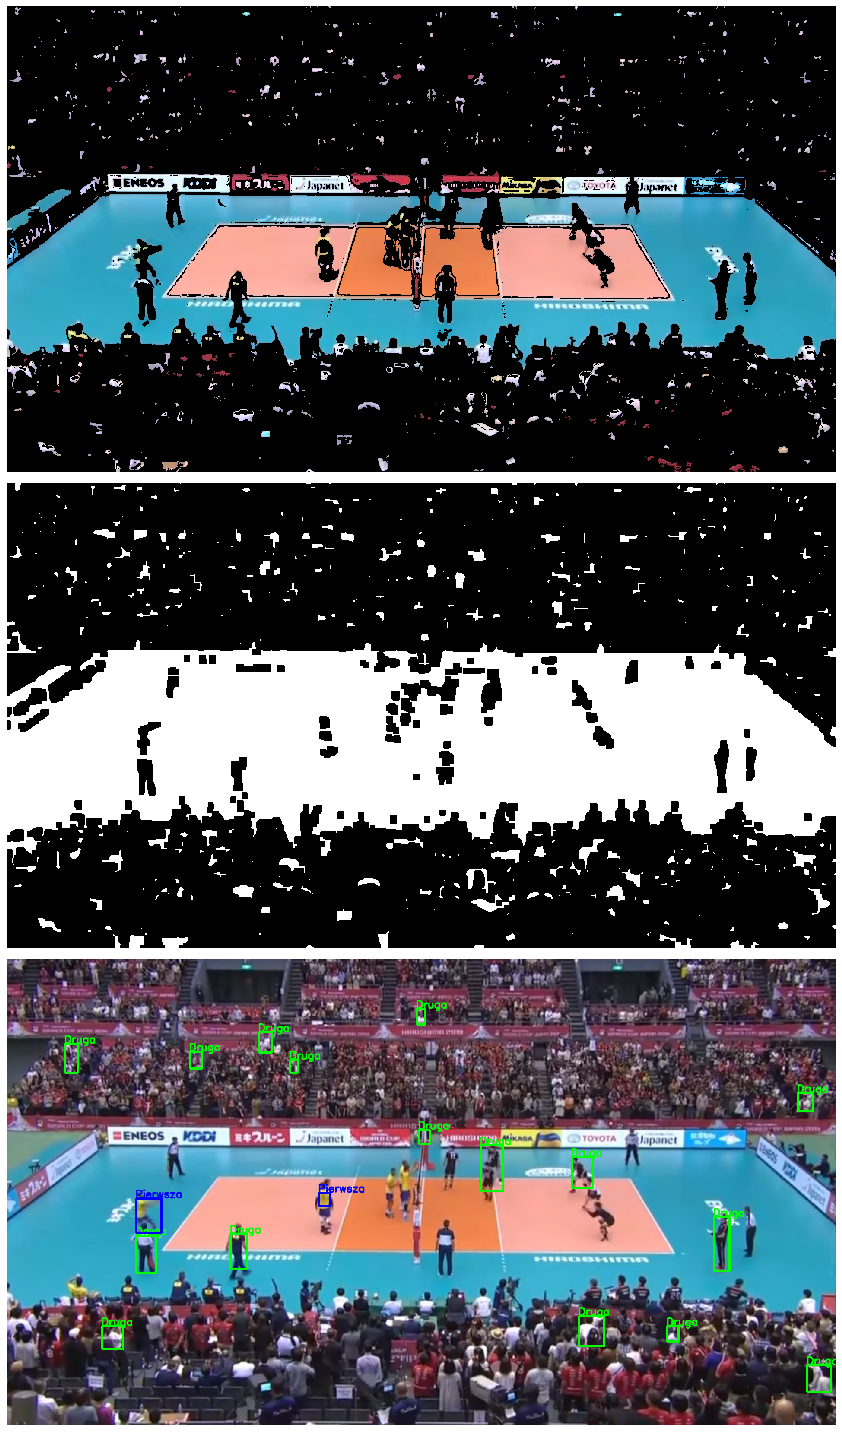

In [4]:
# Główny program
import numpy as np
import cv2
import opencv_wrapper as cvw
import skimage as ski
from skimage import data,io,img_as_float
import matplotlib.pyplot as plt
#tylko do notebooka
%matplotlib inline 
plt.figure(figsize=(20, 20))
sp=plt.subplot(3, 1, 1)
sp.axis('off')

img = cv2.imread('field.jpg') 
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
idx=0    
#converting into hsv image
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)







#Manual HSV limits for colors, first two are colors of shirts of both teams
lowerLimit= []
upperLimit= []
lowerLimit.append([16, 72, 164] )
upperLimit.append([36, 204, 239])
lowerLimit.append([141, 73, 27] )
upperLimit.append( [179, 140, 63])
#Background 
lowerLimit.append([0, 77, 241])
upperLimit.append([8, 109, 265])
lowerLimit.append([6, 156, 218])
upperLimit.append([13, 185, 258])
lowerLimit.append([92, 123, 167])
upperLimit.append([102, 215, 230])
lowerLimit.append([87, 9, 242])
upperLimit.append([179, 56, 265])
lowerLimit.append([171, 153, 128])
upperLimit.append( [182, 197, 217])
lowerLimit.append([2, 36, 175])
upperLimit.append( [104, 132, 265])
lowerLimit.append([4, 0, 173])
upperLimit.append( [173, 55, 245])





#Define a mask ranging from lower to uppper
mask = 0
#Combining masks
#lowerlimit[x] upperlimit[x]
#x = 0 || 1 => team colors
#x > 1 => background (hopefully won't be needed)
for i in range(2,len(lowerLimit)):
    maskpart = cv2.inRange(hsv, np.array(lowerLimit[i]), np.array(upperLimit[i]))
    mask += maskpart
#Do masking
res = cv2.bitwise_and(img, img, mask=mask)
#convert to hsv to gray
res_bgr = cv2.cvtColor(res,cv2.COLOR_HSV2BGR)
res_gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)


io.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))  
#Defining a kernel to do morphological operation in threshold image to get better output
kernel = np.ones((13,13),np.uint8)
thresh = cv2.threshold(res_gray,127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

sp=plt.subplot(3, 1, 2)
sp.axis('off')
io.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

#find contours in threshold image     
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


prev = 0
font = cv2.FONT_HERSHEY_SIMPLEX
#Countour processing
for c in contours:
		x,y,w,h = cv2.boundingRect(c)
		
		#Detect players
		if(h>=(1.1)*w):
			if(100>w>15 and 150>h>= 30):
				idx = idx+1
				player_img = img[y:y+h,x:x+w]
				player_hsv = cv2.cvtColor(player_img,cv2.COLOR_BGR2HSV)
				#First set
				maskfirst = cv2.inRange(player_hsv, np.array(lowerLimit[0]), np.array(upperLimit[0]))
				res1 = cv2.bitwise_and(player_img, player_img, mask=maskfirst)
				res1 = cv2.cvtColor(res1,cv2.COLOR_HSV2BGR)
				res1 = cv2.cvtColor(res1,cv2.COLOR_BGR2GRAY)
				nzCountone = cv2.countNonZero(res1)
				#Second set
				masksecond = cv2.inRange(player_hsv, np.array(lowerLimit[1]), np.array(upperLimit[1]))
				res2 = cv2.bitwise_and(player_img, player_img, mask=masksecond)
				res2 = cv2.cvtColor(res2,cv2.COLOR_HSV2BGR)
				res2 = cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)
				nzCounttwo = cv2.countNonZero(res2)

				if(nzCountone >= 20):
					#Mark first
					cv2.putText(img, 'Pierwsza', (x-2, y-2), font, 0.8, (255,0,0), 2, cv2.LINE_AA)
					cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
				else:
					pass
				if(nzCounttwo >= 20):
					#Mark second
					cv2.putText(img, 'Druga', (x-2, y-2), font, 0.8, (0,255,0), 2, cv2.LINE_AA)
					cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
				else:
					pass
sp=plt.subplot(3, 1, 3)
sp.axis('off')
io.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [21]:
#Szukanie kolorków w zakresach HSV

import numpy as np
import cv2


colors = []

def on_mouse_click (event, x, y, flags, frame):
    if event == cv2.EVENT_LBUTTONUP:
        colors.append(frame[y,x].tolist())


#capture = cv2.VideoCapture(0)

while True:
    frame = cv2.imread('field2.jpg') 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    if colors:
        cv2.putText(hsv, str(colors[-1]), (10, 50), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 0), 2)
    cv2.imshow('frame', frame)
    cv2.setMouseCallback('frame', on_mouse_click, hsv)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#capture.release()
cv2.destroyAllWindows()

# avgb = int(sum(c[0] for c in colors) / len(colors))
# avgg = int(sum(c[0] for c in colors) / len(colors))
# avgr = int(sum(c[0] for c in colors) / len(colors))
# print avgb, avgg, avgr

#zakres powiększony by żyło się lepiej
minb = min(c[0] for c in colors) -3
ming = min(c[1] for c in colors) -10
minr = min(c[2] for c in colors) -10
maxb = max(c[0] for c in colors) +3
maxg = max(c[1] for c in colors) +10
maxr = max(c[2] for c in colors) +10
print (minr, ming, minb, maxr, maxg, maxb)
lb = [minb,ming,minr]
ub = [maxb,maxg,maxr]
print (lb, ub)

244 73 -1 265 108 7
[-1, 73, 244] [7, 108, 265]


In [7]:
import cv2 as cv
import numpy as np
from numpy.core.numeric import bitwise_not

img = cv.imread('field.jpg')
img = cv.resize(img, (800, 500))
# img = cv.bilateralFilter(img, 9, 75, 75)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Teal range
lower_teal = np.array([50, 40, 40])
upper_teal = np.array([100, 255, 255])

# Orange range
lower_orange = np.array([00, 60, 60])
upper_orange = np.array([15, 255, 255])

# Define a mask ranging from lower to uppper
mask_orange = cv.inRange(hsv, lower_orange, upper_orange)
mask_teal = cv.inRange(hsv, lower_teal, upper_teal)

# caly parkiet
# mask_court = cv.bitwise_or(mask_teal, mask_orange)

# smoothing
kernel = np.ones((5, 5), np.uint8)
mask_orange = cv.dilate(mask_orange, kernel, iterations=5)
mask_orange = cv.erode(mask_orange, kernel, iterations=5)


cv.imshow('mask', mask_orange)

contoursImage = img.copy()
contours, hierarchy = cv.findContours(
    mask_orange.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

contours_areas = list(map(cv.contourArea, contours))
# largest contour is court contour
court_contour = [contours[contours_areas.index(max(contours_areas))]]

court_mask = np.zeros((500, 800))
cv.fillPoly(court_mask, pts=court_contour, color=(1))

court_mask = np.array(court_mask, dtype=np.uint8)
court_mask *= 255

canny_court_mask = cv.Canny(court_mask, 50, 150)
cv.imshow('canny_court_mask', canny_court_mask)

# drawing lines
lines = cv.HoughLines(canny_court_mask, 1, np.pi/180, 100)

print(lines)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(contoursImage, (x1, y1), (x2, y2), (0, 255, 0), 2)

contours, hierarchy = cv.findContours(
    court_mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


cv.drawContours(contoursImage, contours, 0,
                (0, 0, 255), thickness=4)


cv.namedWindow("1", cv.WINDOW_AUTOSIZE)
cv.imshow('1', contoursImage)
cv.moveWindow('1', 200, 100)
cv.waitKey()
cv.destroyAllWindows()


[[[367.          1.5707964]]

 [[286.          1.5707964]]

 [[293.          1.553343 ]]

 [[376.          1.553343 ]]

 [[363.          1.5882496]]]


In [77]:
import cv2 as cv
import numpy as np
from numpy.core.numeric import bitwise_not
from time import sleep

img = cv.imread('field.jpg')
cap = cv.VideoCapture('cut.mp4')
# vidObj = cv.VideoCapture(0)
#Manual HSV limits for colors, first two are colors of shirts of both teams
lowerLimit= []
upperLimit= []
lowerLimit.append([3, -2, 176])
upperLimit.append([166, 54, 233])
lowerLimit.append([2, 40, 35] )
upperLimit.append([131, 243, 86])
#Background 
lowerLimit.append([0, 77, 241])
upperLimit.append([8, 109, 265])
lowerLimit.append([6, 156, 218])
upperLimit.append([13, 185, 258])
lowerLimit.append([92, 123, 167])
upperLimit.append([102, 215, 230])
lowerLimit.append([87, 9, 242])
upperLimit.append([179, 56, 265])
lowerLimit.append([171, 153, 128])
upperLimit.append( [182, 197, 217])
lowerLimit.append([2, 36, 175])
upperLimit.append( [104, 132, 265])
lowerLimit.append([4, 0, 173])
upperLimit.append( [173, 55, 245])

#Define a mask ranging from lower to uppper
mask = 0
#Combining masks
#lowerlimit[x] upperlimit[x]
#x = 0 || 1 => team colors
#x > 1 => background (hopefully won't be needed)
for i in range(0,2):
    maskpart = cv2.inRange(hsv, np.array(lowerLimit[i]), np.array(upperLimit[i]))
    mask += maskpart
while True:
    success, img = cap.read()
    if not success:
        break
    img = cv.resize(img, (800, 500))
    # img = cv.bilateralFilter(img, 9, 75, 75)
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # Teal range
    lower_teal = np.array([50, 40, 40])
    upper_teal = np.array([100, 255, 255])

    # Orange range
    lower_orange = np.array([0, 120, 120])
    upper_orange = np.array([15, 255, 255])
    
    # Cream range
    lower_cream = np.array([0, 50, 150])
    upper_cream = np.array([10, 255, 255])

    # Define a mask ranging from lower to uppper
    mask_orange = cv.inRange(hsv, lower_orange, upper_orange) + cv.inRange(hsv, lower_cream, upper_cream) 
    mask_teal = cv.inRange(hsv, lower_teal, upper_teal)

    # caly parkiet
    # mask_court = cv.bitwise_or(mask_teal, mask_orange)

    # smoothing
    kernel = np.ones((5, 5), np.uint8)
    mask_orange = cv.dilate(mask_orange, kernel, iterations=5)
    mask_orange = cv.erode(mask_orange, kernel, iterations=5)

    # cv.imshow('mask', mask_orange)

    contoursImage = img.copy()
    contours, hierarchy = cv.findContours(
        mask_orange.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    contours_areas = list(map(cv.contourArea, contours))
    # largest contour is court contour
    if contours_areas:
        court_contour = [contours[contours_areas.index(max(contours_areas))]]

        court_mask = np.zeros((500, 800))
        cv.fillPoly(court_mask, pts=court_contour, color=(1))

        court_mask = np.array(court_mask, dtype=np.uint8)
        court_mask *= 255

        canny_court_mask = cv.Canny(court_mask, 50, 150)
        # cv.imshow('canny_court_mask', canny_court_mask)

        contours, hierarchy = cv.findContours(
            court_mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

        hull = []
        for contour in contours:
            hull.append(cv.convexHull(contour, False))

        if cv.contourArea(hull[0]) > 20000:
            cv.drawContours(contoursImage, hull, 0,
                            (0, 0, 255), thickness=4)
    
    #Players
    
    





    #Do masking
    res = cv.bitwise_and(img, img, mask=mask)
    #convert to hsv to gray
    res_bgr = cv.cvtColor(res,cv.COLOR_HSV2BGR)
    res_gray = cv.cvtColor(res,cv.COLOR_BGR2GRAY)


    #Defining a kernel to do morphological operation in threshold image to get better output
    kernel = np.ones((10,10),np.uint8)
    thresh = cv.threshold(res_gray,127,255,cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
    thresh = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)


    #find contours in threshold image     
    contours,hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)


    prev = 0
    font = cv.FONT_HERSHEY_SIMPLEX
    #Countour processing
    for c in contours:
            x,y,w,h = cv.boundingRect(c)
            #Check for contours within court
            if(cv.pointPolygonTest(contour,(x+w/2, y+h/2),False)==-1):
                #Check for contours near court (distance is minus)
                if(cv.pointPolygonTest(contour,(x+w/2, y+h/2),True)<=-50):
                    #print(cv.pointPolygonTest(contour,(x+w/2, y+h/2),True))
                    continue
            
            #Detect players
            if(h>=(1.1)*w):
                if(100>w>15 and 150>h>= 30):
                    idx = idx+1
                    player_img = img[y:y+h,x:x+w]
                    player_hsv = cv.cvtColor(player_img,cv.COLOR_BGR2HSV)
                    #First set
                    maskfirst = cv.inRange(player_hsv, np.array(lowerLimit[0]), np.array(upperLimit[0]))
                    res1 = cv.bitwise_and(player_img, player_img, mask=maskfirst)
                    res1 = cv.cvtColor(res1,cv.COLOR_HSV2BGR)
                    res1 = cv.cvtColor(res1,cv.COLOR_BGR2GRAY)
                    nzCountone = cv.countNonZero(res1)
                    #Second set
                    masksecond = cv.inRange(player_hsv, np.array(lowerLimit[1]), np.array(upperLimit[1]))
                    res2 = cv.bitwise_and(player_img, player_img, mask=masksecond)
                    res2 = cv.cvtColor(res2,cv.COLOR_HSV2BGR)
                    res2 = cv.cvtColor(res2,cv.COLOR_BGR2GRAY)
                    nzCounttwo = cv.countNonZero(res2)

                    if(nzCountone >= 20):
                        #Mark first
                        cv.putText(contoursImage, 'Pierwsza', (x-2, y-2), font, 0.8, (255,0,0), 2, cv.LINE_AA)
                        cv.rectangle(contoursImage,(x,y),(x+w,y+h),(255,0,0),3)
                    else:
                        pass
                    if(nzCounttwo >= 20):
                        #Mark second
                        cv.putText(contoursImage, 'Druga', (x-2, y-2), font, 0.8, (0,255,0), 2, cv.LINE_AA)
                        cv.rectangle(contoursImage,(x,y),(x+w,y+h),(0,255,0),3)
                    else:
                        pass

    
    #Show results

    cv.imshow('1', contoursImage)
    cv.moveWindow('1', 200, 100)
    sleep(0.05)
    # cv.waitKey()
    # cv.namedWindow("1", cv.WINDOW_AUTOSIZE)
    # cv.destroyAllWindows()
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()